# Hypothesis tests

We will introduce Hypothesis tests looking at the example of a counting experiment with background uncertainty. 

## p-value for discovery of a new signal

In searches for new physics we want to know how significant a potential deviation from our Standard Model (SM) expectation is. We do this by a hypothesis test where we try to exclude the SM ("background only") hypothesis. We use a so called **p-value** $p_0$ for this, abstractly defined by:

$$p_0 = \int\limits_{t_\mathrm{obs}}^{\infty}p(t|H_0)\mathrm{d}t$$

where $t$ is a test statistic (a number we calculate from our data observations) and $p(t|H_0)$ is the probability distribution for $t$ under the assumption of our **null Hypothesis** $H_0$, in this case the background only hypothesis. This p-value is then typically converted into a number of standard deviations $z$, the **significance** ("number of sigmas") via the inverse of the cumulative standard normal distribution $\Phi$:

$$z = \Phi^{-1}(1 - p)$$

The typical convention for particle physics is to speak of *evidence* when $z>3$ and of an *observation* when $z>5$.

So what do we use for $t$? We want to use something that discriminates well between our null Hypothesis and an **alternative Hypothesis** that we have in mind. When we try to discover new physics, our null Hypothesis is the absence and the alternative Hypothesis the presence of a signal. We can parametrize this by a **signal strength** parameter $\mu$. The test statistics used in almost all LHC searches use the **profile likelihood ratio**

$$\Lambda_\mu = \frac{L(\mu, \hat{\hat{\theta}})}{L(\hat{\mu}, \hat{\theta})}$$

where $\theta$ are the other parameters of our model that are not part of the test, the so called **nuisance parameters**. In contrast, the parameter that we want to test, $\mu$, is called our **parameter of interest** (POI). The nuisance parameters include all fit parameters, like normalization factors and parameters for describing uncertainties. $L(\mu, \hat{\hat{\theta}})$ is the Likelihood function, maximized under the condition that our parameter of interest takes the value $\mu$ and $L(\hat{\mu}, \hat{\theta})$ is the unconditionally maximized Likelihood. So roughly speaking, we are calculating the fraction of the maximum possible likelihood that we can get under our test condition. If it is high, that speaks for our hypothesis, if it is low, against. The test statistic $t_\mu$ is then defined as

$$t_\mu = -2\ln\Lambda_\mu$$

giving us a test statistic where **high values speak against the null hypothesis**.

<div class="alert alert-block alert-success">
    <b>Question 7:</b> If we want to discover a new signal (using the p-value $p_0$), which value of $\mu$ are we testing against? Or in other words, what is our null Hypothesis?
</div>

<b>Answer:</b> The null hypothesis is $\mu=0$.

All that's left now is to know the distribution of $p(t_\mu|H_0)$. [Wilk's theorem](https://en.wikipedia.org/wiki/Wilks%27_theorem) tells us that the distribution of $t_\mu$ is asymptotically (for large sample sizes) a chi-square distribution with degrees of freedom parameter equal to the difference of number of free parameters in the alternative (denominator) hypothesis and the null (numerator) hypothesis, in this case 1 since we have one parameter of interest and the number of nuisance parameters is the same for both Hypothesis. For the discovery p-value we use a slightly modified version of test statistic, called $q_0$ where $\hat{\mu}$ is required to be $>=0$ ($q_0=0$ for $\hat{\mu} < 0$). For $q_0$ the p-value in the asymptotic limit collapses to a very simple formula:

$$p_0 = \sqrt{q_0}$$

The asymptotic limit often matches quite well even for fairly small sample sizes, but it should be kept in mind this is an approximation. Alternatively, one can evaluate $p(t_\mu|H_0)$ by Monte Carlo sampling ("toys").

## CLs for exclusion of an absent signal

Now, sadly, not all searches find evidence for new physics. What we still can do in such a case is to try exclude models by rejecting the hypothesis of a signal being present. That usually means we test against $\mu=1$ or some other value $>0$. The rest of the procedure is very similar with one small detail worth mentioning ... In high energy physics it is very common to use a quantity called $CL_s$ instead of plain p-value. It is defined by

$$CL_s = \frac{CL_{s+b}}{CL_{b}}$$

where $CL_{s+b}$ is the p-value for rejecting the hypothesis of signal + background being present (what would be the "normal" p-value) and $CL_{b}$ is the p-value for rejecting the background only hypothesis, but now using the test statistic for $\mu=1$ (so this is different from $p_0$!). We won't go into further details how to calculate those p-values.

The asymptotic distributions for all different variants are described in the paper "Asymptotic formulae for likelihood-based tests of new physics" ([arXiv:1007.1727](https://arxiv.org/abs/1007.1727)).

Just a qualitative explanation of why we use $CL_s$ instead of the p-value: We want to avoid excluding signals in cases where we don't have sensitivity, but observe an *underfluctuation* of the data. In these cases $CL_{s+b}$ and $CL_b$ will be very similar and consequently lead to a large value of $CL_{s}$, telling us the signal is **not** excluded. In case our observations are exactly on spot with the background expectations $CL_b = 0.5$ in the asymptotic limit, so on average we have twice as high "p-values" with $CL_s$.

The typical convention for particle physics is to speak of an **exclusion** of a signal if $CL_s < 0.05$. That's usually what is meant by "limit at 95% confidence level".

## Introduction and reminders

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy import stats

Converting p-values and significances (number of standard deviations $z$) is done using the inverse of the cumulative standard normal distribution $\Phi$

$$z = \Phi^{-1}(1 - p)$$

The function [`scipy.stats.norm.isf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm) ("inverse survival function") calculates $\Phi^{-1}(1 - p)$ in a numerically stable way (also for small p-values).

In [2]:
def pvalue_to_significance(pvalue):
    return stats.norm.isf(pvalue)

The other direction is given by

$$p = 1 - \Phi(z)$$

which is provided numerically stable by `scipy.stats.norm.isf` ("survival function")

In [3]:
def significance_to_pvalue(significance):
    return stats.norm.sf(significance)

In [4]:
[(z, significance_to_pvalue(z)) for z in range(6)]

[(0, np.float64(0.5)),
 (1, np.float64(0.15865525393145707)),
 (2, np.float64(0.0227501319481792)),
 (3, np.float64(0.001349898031630093)),
 (4, np.float64(3.167124183311986e-05)),
 (5, np.float64(2.8665157187919333e-07))]

**Note:** This conversion assumes *one-sided* p-values - integrating in direction of the tail of one side of a normal distribution. *Two-sided* p-values are twice as large for the same significance

In [5]:
[(z, 2*significance_to_pvalue(z)) for z in range(6)]

[(0, np.float64(1.0)),
 (1, np.float64(0.31731050786291415)),
 (2, np.float64(0.0455002638963584)),
 (3, np.float64(0.002699796063260186)),
 (4, np.float64(6.334248366623973e-05)),
 (5, np.float64(5.733031437583867e-07))]

Let's look at a simple counting experiment where we know the expected number of background events and assume a Poisson distribution

<div class="alert alert-block alert-success">
    <b>Question 8:</b> We expect 5 background events (our null Hypothesis). How many events would we need to observe to reject the null hypothesis with at least 3 (evidence) and 5 (observation) sigma? Our test statistic is the total number of events observed and we count more events than the expectation as evidence against the null hypothesis.<br><br>
    <b>Hint:</b> Iterate through the number of events observed, starting from 5 upwards and use <code>1 - stats.poisson.cdf(...)</code> to calculate the p-value.
</div>

In [9]:
exp = 5
for num in range(5,100):
    p = 1 - stats.poisson.cdf(num, exp)
    z = pvalue_to_significance(p)
    print(f"{z:.2f} sigma for {num} events")
    if z > 5:
        break

0.29 sigma for 5 events
0.71 sigma for 6 events
1.11 sigma for 7 events
1.49 sigma for 8 events
1.85 sigma for 9 events
2.21 sigma for 10 events
2.55 sigma for 11 events
2.88 sigma for 12 events
3.20 sigma for 13 events
3.51 sigma for 14 events
3.81 sigma for 15 events
4.11 sigma for 16 events
4.40 sigma for 17 events
4.68 sigma for 18 events
4.96 sigma for 19 events
5.24 sigma for 20 events


<div class="alert alert-block alert-success">
    <b>Question 9:</b> If we turn the hypotheses around and now want to exclude the presence of a signal - what is the smallest upper limit at 95% confidence level (p-value smaller than 0.05) on the number of signal events we can possibly get from a counting experiment? Here our Null hypothesis would be the presence of a signal and we count fewer events than observed as evidence against it.
</div>

In [17]:
exp_sig = 0
for num in range(100):
    p = stats.poisson.cdf(exp_sig, num)
    print(f"p-value = {p:.3g} for {num} events")
    if p < 0.05:
        break

p-value = 1 for 0 events
p-value = 0.368 for 1 events
p-value = 0.135 for 2 events
p-value = 0.0498 for 3 events


## Discovery or exclusion of a signal for a counting experiment with background uncertainty (the "on-off" problem)

Let's now go again to the situation where we have an uncertainty on the background model. How do we incorporate this? If we do Bayesian statistics we could regard the uncertainty as our prior on the background expectation, assume some other prior on the signal and get the posterior of the signal given the data.

Here we want to investigate the Frequentist method. What does "uncertainty" on the background mean in this case? In Frequentist statistics only the observations are random variables, but the parameters of our model are fixed Hypothesis. A typical way to incorporate an uncertainty on a parameter is to view this as determined from an additional ("auxiliary") measurment. For our case of background uncertainty we could for example assume we look now at 2 counts, one in a region where we have background and signal ("on"), and another one where we have only background ("off") and assume we know the ratio $\tau$ of background events in the two regions. This is perfectly applicable to many real situations, e.g.

* Our background uncertainty may come from a sideband measurement, e.g. we have a peaking signal where we can look on-peak and off-peak.
* We may have determined the background from a Monte-Carlo (MC) sample where we know the shape (therefore ratio $\tau$), but not the normalization.

The likelihood function for this can be formulated as a primary measurement of `n_on` events and a control ("auxiliary") measurment of `n_off` events that constrains our background parameter within the uncertainty. So, a product of 2 Poisson distributions:

$$L(s, b) = \mathrm{Pois}(n_\mathrm{on}|s + b)\cdot \mathrm{Pois}(n_\mathrm{off}|\tau b)$$

The parameter $\tau$ can be given in terms of our background uncertainty $\sigma_b$ by asking the question "How much more events do i have to measure in the control region to get the relative uncertainty $\sigma_b / b$". That gives

$\tau = \frac{b}{\sigma_b^2}$

You already know from the lecture how to get the negative log-likelihood for a histogram with poisson counts (here we will have a histogram with only 2 bins):

In [18]:
def nll_hist(obs, exp):
    """
    Negative log-likelihood for histogram with poisson distributed counts (up to constant terms)
    """
    return np.sum(exp, axis=0) - np.sum(obs * np.log(exp), axis=0)

Let's assume the following situation:

In [19]:
b = 5
delta_b = 2

nobs = 11

What's the p-value for rejecting the null hypothesis of no signal?

In [20]:
def tau_from_db(b, db):
    """
    Calculate tau (the ratio between expected background in the off and on region)
    from the expected background and the absolute uncertainty on it.
    """
    return b / (db ** 2)

In [21]:
non = nobs
tau = tau_from_db(b, delta_b)
noff = tau * b

In [22]:
def nll_onoff(non, noff, s, b, tau):
    obs = np.array([non, noff])
    exp = np.array([s + b, tau * b])
    return nll_hist(obs, exp)

In [23]:
nll_onoff(non, noff, s=0, b=b, tau=tau)

np.float64(-17.907451185202042)

We will use the (profile) likelihood ratio test statistic to quantify this.

Our **alternative hypothesis** (H1) is given by an **unconditional fit**, allowing signal:

In [24]:
minimize(lambda pars: nll_onoff(non, noff, s=pars[0], b=pars[1], tau=tau), (1, 1))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -20.580482149101474
        x: [ 6.000e+00  5.000e+00]
      nit: 14
      jac: [-9.537e-07 -8.106e-06]
 hess_inv: [[ 1.487e+01 -3.821e+00]
            [-3.821e+00  3.771e+00]]
     nfev: 45
     njev: 15

This makes sense - we fit 6 signal events and 5 background events, matching the 11 observations.

The **null hypothesis** (H0) is given by a **conditional fit, assuming 0 signal**:

In [25]:
minimize(lambda pars: nll_onoff(non, noff, s=0, b=pars[0], tau=tau), (1,))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -19.280860440943535
        x: [ 7.667e+00]
      nit: 9
      jac: [-3.815e-06]
 hess_inv: [[ 3.385e+00]]
     nfev: 20
     njev: 10

The background gets slightly "pulled" up from the expectation of 5, but disagreement with observations remains since it is constrained by the "off" region. The amount of allowed "pull" is given by the uncertainty.

This setup has the nice property that we don't need to do a fit since we can find the maximum likelihood estimates (MLEs) analytically:

In [26]:
import sympy
from sympy.solvers import solve

In [27]:
non_, noff_, s_, b_, tau_ = sympy.symbols("n_on n_off s b tau")

In [28]:
nll = (s_ + b_) + (tau_ * b_) - (non_ * sympy.log(s_ + b_) + noff_ * sympy.log(tau_ * b_))
nll

b*tau + b - n_off*log(b*tau) - n_on*log(b + s) + s

In [29]:
s_hat = solve(sympy.diff(nll, s_), s_)[0]
s_hat

-b + n_on

In [30]:
b_hat = solve(sympy.diff(nll.subs(s_, s_hat), b_), b_)[0]
b_hat

n_off/tau

These two are intuitively very clear - without constraint the best-fit signal yield will just be the total number of "on" events minus the number of expected background and the background will be exclusively determined from the "off" region.

The best-fit background for a fixed signal is less clear and we will get 2 solutions for the quadratic equation that results from setting the derivative to 0:

In [31]:
b_hathat = solve(sympy.diff(nll, b_), b_)
display(b_hathat[0])
display(b_hathat[1])

(n_off + n_on - s*tau - s - sqrt(n_off**2 + 2*n_off*n_on + 2*n_off*s*tau + 2*n_off*s + n_on**2 - 2*n_on*s*tau - 2*n_on*s + s**2*tau**2 + 2*s**2*tau + s**2))/(2*(tau + 1))

(n_off + n_on - s*tau - s + sqrt(n_off**2 + 2*n_off*n_on + 2*n_off*s*tau + 2*n_off*s + n_on**2 - 2*n_on*s*tau - 2*n_on*s + s**2*tau**2 + 2*s**2*tau + s**2))/(2*(tau + 1))

Here we only need the case for `s=0`:

In [32]:
display(b_hathat[0].subs(s_, 0))
display(b_hathat[1].subs(s_, 0))

(n_off + n_on - sqrt(n_off**2 + 2*n_off*n_on + n_on**2))/(2*(tau + 1))

(n_off + n_on + sqrt(n_off**2 + 2*n_off*n_on + n_on**2))/(2*(tau + 1))

We can simplify the expression under the square root and see that the first solution is 0 which is not a useful estimate, so we only need the second solution.

The relevant MLEs to get the log-likelihood ratio test statistic are therefore:

In [33]:
def mles(non, noff, b, tau):
    "Maximum likelihood estimates for the on-off likelihood"
    shat = non - b
    bhat = noff / tau
    bhathat = (noff + non) / (tau + 1)
    return shat, bhat, bhathat

In [34]:
mles(non, noff, b, tau) # consistent with fit above

(6, 5.0, 7.666666666666667)

In [35]:
def nllr(non, noff, tau):
    """
    Negative log likelihood ratio for on-off problem
    """
    b = noff / tau
    shat, bhat, bhathat = mles(non, noff, b, tau)

    cond_nll = nll_onoff(non, noff, s=0, b=bhathat, tau=tau)
    uncond_nll = nll_onoff(non, noff, s=shat, b=bhat, tau=tau)

    return np.where(
        (shat <= 0) | (bhat <= 0),
        0, # we choose to view lower counts as background expectation not as evidence against signal
        cond_nll - uncond_nll
    )

In [36]:
q0_obs = 2 * nllr(non, noff, tau)
q0_obs

np.float64(2.5992434164845406)

Is this significant? Let's throw toys under null hypothesis

In [37]:
n_toys = 100000
toys = 2 * nllr(np.random.poisson(b, size=n_toys), np.random.poisson(tau * b, size=n_toys), tau)

C:\Users\Max\AppData\Local\Temp\ipykernel_18152\3790712335.py:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(exp, axis=0) - np.sum(obs * np.log(exp), axis=0)
C:\Users\Max\AppData\Local\Temp\ipykernel_18152\3790712335.py:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(exp, axis=0) - np.sum(obs * np.log(exp), axis=0)


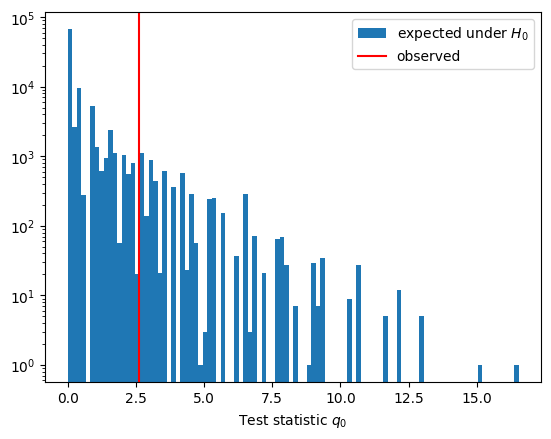

In [38]:
plt.hist(toys, bins=100, label="expected under $H_0$");
plt.axvline(q0_obs, color="red", label="observed")
plt.yscale("log")
plt.xlabel("Test statistic $q_0$")
plt.legend()

<div class="alert alert-block alert-success">
    <b>Question 10:</b> Using the toy data - what is the p-value?
</div>

<div class="alert alert-block alert-success">
    <b>Question 11:</b> How well does this agree with the asymptotic distribution (chi squared distribution with one degree of freedom, scaled by a factor of 0.5). What is the p-value from the asymptotic formula? Have a look at the Introduction for the formula.
</div>

In [40]:
pvalue = (toys >= q0_obs).mean()
pvalue

np.float64(0.05875)

0.05345737165180752


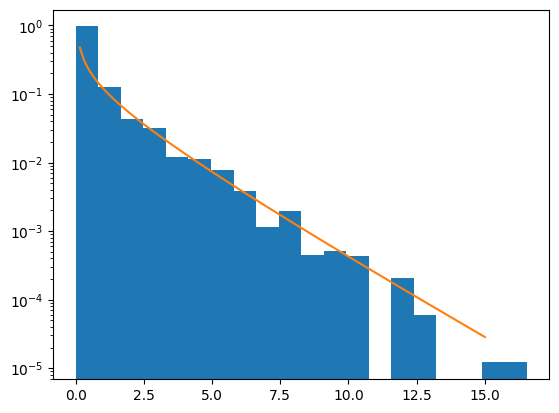

In [42]:
pvalue_asymptotic = significance_to_pvalue(np.sqrt(q0_obs))
print(pvalue_asymptotic)
plt.hist(toys, bins=20, density=True);
x = np.linspace(0, 15, 100)
plt.plot(x, 0.5*stats.chi2.pdf(x, 1))
plt.yscale("log")